1. Differential Motion Analysis

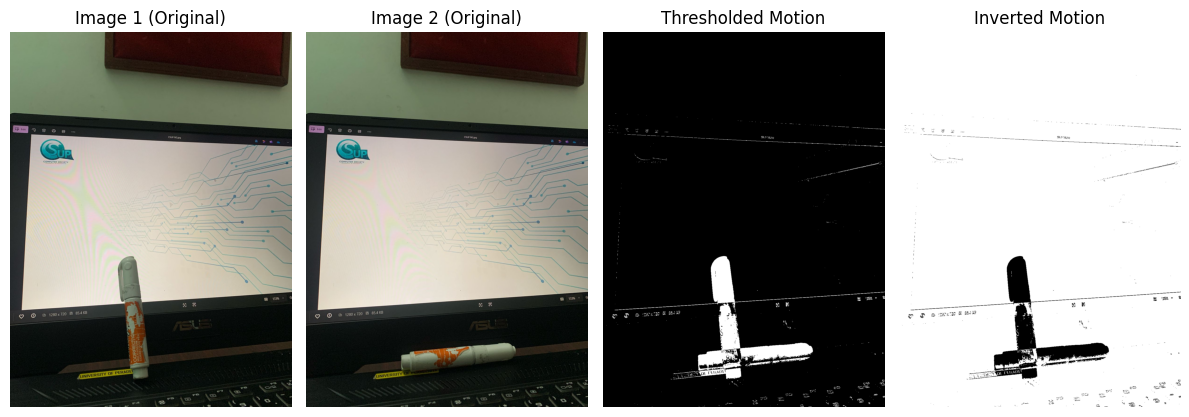

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/tipex.jpg"
    image2_path = "Images/tipexShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)


2. For Mutiple Objects

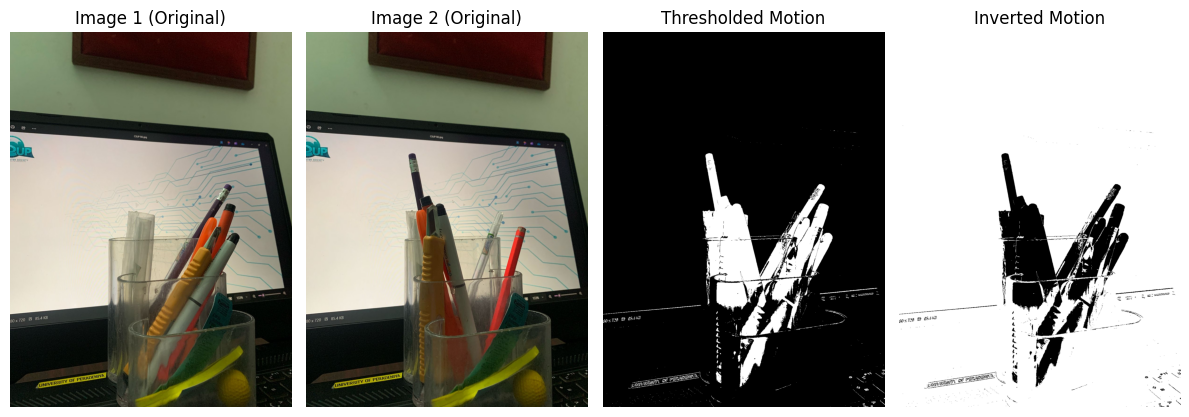

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/mulObj.jpg"
    image2_path = "Images/mulObjShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)


3. With Noise

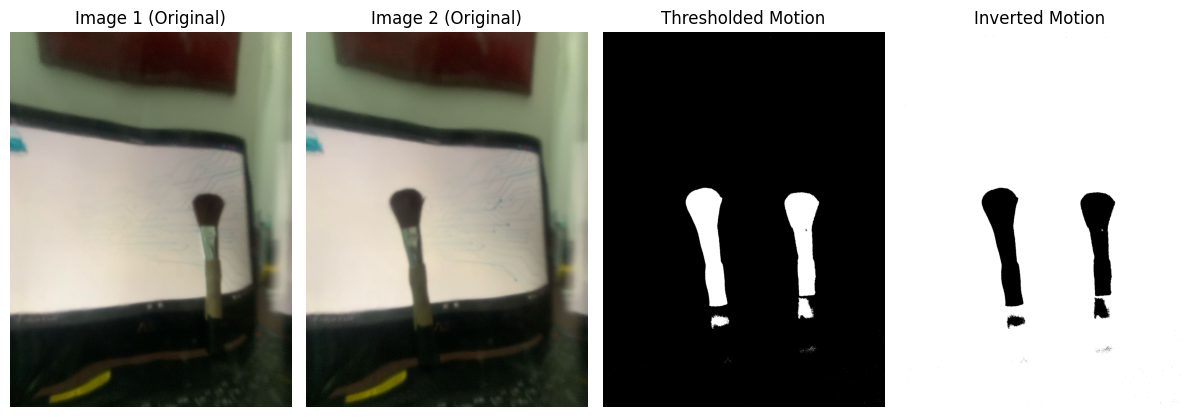

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/withNoise.jpg"
    image2_path = "Images/withNoiseShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)


4. With Low Light Condition

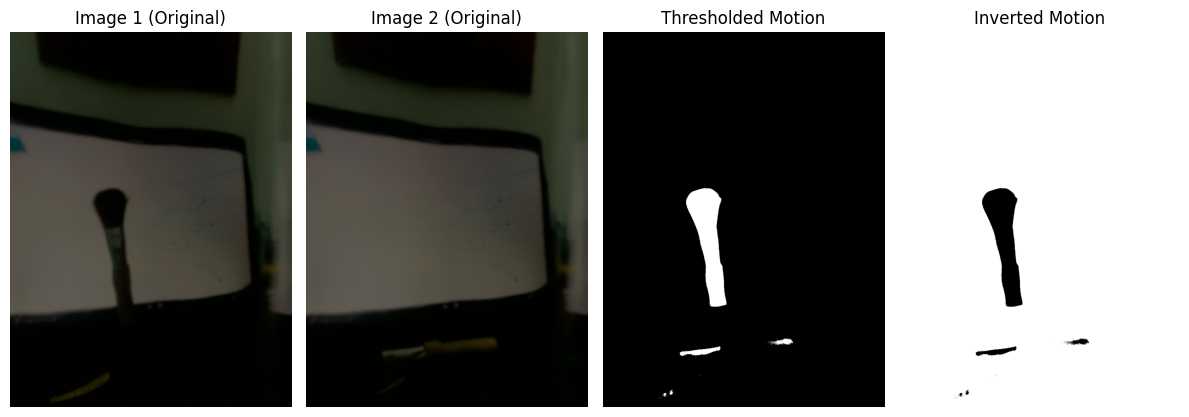

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/lowLight.jpg"
    image2_path = "Images/lowLightShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)

5. With Illumination Changes

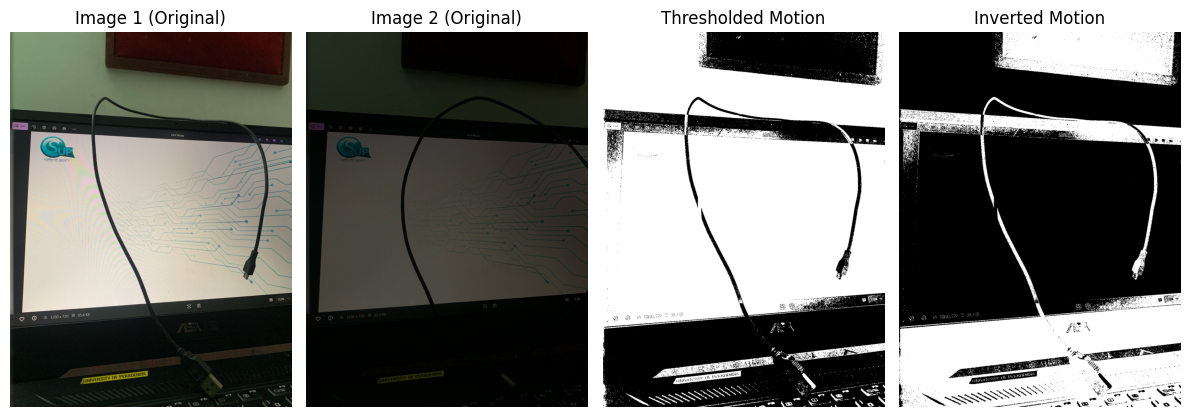

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def differential_motion_analysis(image1_path, image2_path, threshold_value=30):
    # Load the images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error: One of the images didn't load properly.")
        return None

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference
    diff = cv2.absdiff(gray1, gray2)

    # Apply binary threshold to highlight motion areas
    _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    # Invert the final thresholded image for better visibility
    inverted = cv2.bitwise_not(thresh)

    # Convert original images from BGR (OpenCV format) to RGB (Matplotlib format)
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Plot the images using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img1_rgb)
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img2_rgb)
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(thresh, cmap="gray")
    plt.title("Thresholded Motion")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(inverted, cmap="gray")
    plt.title("Inverted Motion")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with the paths to your images
    image1_path = "Images/withillumination.jpg"
    image2_path = "Images/withilluminationShifted.jpg"

    differential_motion_analysis(image1_path, image2_path)

6. Improved Version with Motion Direction

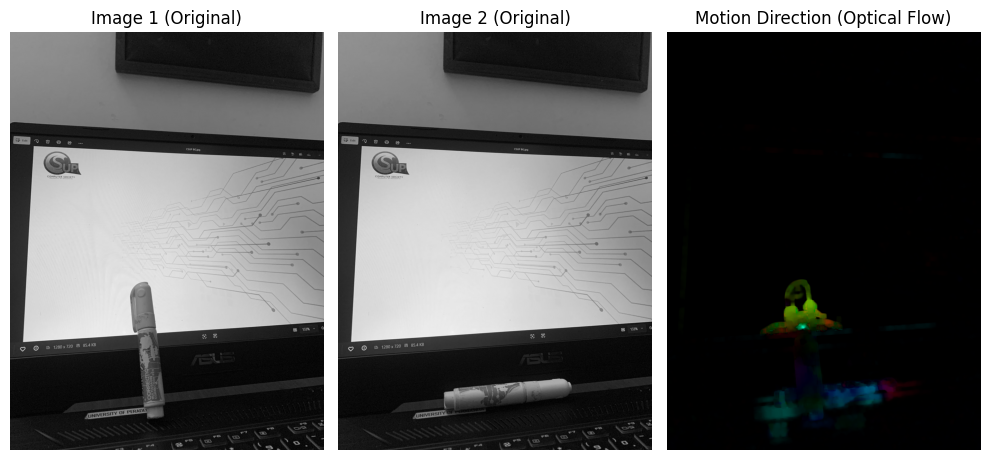

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_motion_direction(image1_path, image2_path):
    # Load images in grayscale
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    # Compute optical flow using Farneback method
    flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute magnitude and angle of motion
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Normalize magnitude for visualization
    norm_magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert angle to HSV color for direction visualization
    hsv = np.zeros((img1.shape[0], img1.shape[1], 3), dtype=np.uint8)
    hsv[..., 0] = angle * 180 / np.pi / 2  # Hue (direction)
    hsv[..., 1] = 255  # Saturation
    hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)  # Value (magnitude)

    # Convert HSV to RGB for plotting
    motion_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Plot results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img1, cmap="gray")
    plt.title("Image 1 (Original)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(img2, cmap="gray")
    plt.title("Image 2 (Original)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(motion_rgb)
    plt.title("Motion Direction (Optical Flow)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Replace with image paths
    image1_path = "Images/mulObj.jpg"
    image2_path = "Images/mulObjShifted.jpg"
    detect_motion_direction(image1_path, image2_path)
